In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-37.328081652183414 -94.06990920208254
-28.372311192205743 63.95921535852071
37.54556833976416 7.37790445624654
-11.943546360718955 85.60849718555374
-6.950386150317115 154.3424093412633
73.10068393446443 105.48340166142202
-48.28143645213218 76.50343488815264
-46.13403899702211 50.31773557673819
6.118863502314966 -117.62160620579142
-13.409025966059204 178.88327788136786
52.87376649708747 42.81281696481582
-59.17603016789259 175.23658786784694
30.319761459108733 65.44393059756129
-61.19079467373297 127.24573785593805
-51.359389419319385 -33.833948172737394
46.133396339788646 6.580008084884099
-55.03982607897041 -14.743451147974724
55.523260040888005 -55.02802000322299
16.79898681514426 -171.0138331989837
-1.965857490966897 151.17686666578538
-42.48437462439681 -15.655969433241836
-0.8286626294456454 25.165602652609294
83.76814102976502 28.687135924147782
-60.66301799527173 -130.80226829768424
56.56123776131582 146.2792825382295
1.4868105914909364 142.26314051848777
52.536113573745695 

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lebu
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | constantine
Processing Record 4 of Set 1 | hithadhoo
Processing Record 5 of Set 1 | panguna
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | asau
Processing Record 10 of Set 1 | gavrilovka vtoraya
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | nushki
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | chuy
Processing Record 15 of Set 1 | cluses
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | saint anthony
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | kavieng
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | kisangani
Processing Record 22 of Set 1 | mehamn
Processing R

Processing Record 41 of Set 4 | mandera
Processing Record 42 of Set 4 | el mahalla el kubra
City not found. Skipping...
Processing Record 43 of Set 4 | sretensk
Processing Record 44 of Set 4 | aleppo
Processing Record 45 of Set 4 | los llanos de aridane
Processing Record 46 of Set 4 | port lincoln
Processing Record 47 of Set 4 | ferrol
Processing Record 48 of Set 4 | mount isa
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | solnechnyy
Processing Record 1 of Set 5 | bowen
Processing Record 2 of Set 5 | mergui
City not found. Skipping...
Processing Record 3 of Set 5 | tasiilaq
Processing Record 4 of Set 5 | kirakira
Processing Record 5 of Set 5 | anloga
Processing Record 6 of Set 5 | coihaique
Processing Record 7 of Set 5 | ravar
Processing Record 8 of Set 5 | komsomolskiy
Processing Record 9 of Set 5 | birnin kebbi
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 11 of Set 5 | hofn
Processing Record 12 of Set 5 | samarai
P

Processing Record 25 of Set 8 | barcelos
Processing Record 26 of Set 8 | shanghai
Processing Record 27 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 28 of Set 8 | juba
Processing Record 29 of Set 8 | rio gallegos
Processing Record 30 of Set 8 | sorvag
City not found. Skipping...
Processing Record 31 of Set 8 | wazzan
City not found. Skipping...
Processing Record 32 of Set 8 | zhigansk
Processing Record 33 of Set 8 | rocha
Processing Record 34 of Set 8 | namibe
Processing Record 35 of Set 8 | villavicencio
Processing Record 36 of Set 8 | kupang
Processing Record 37 of Set 8 | bourail
Processing Record 38 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 39 of Set 8 | monte azul
Processing Record 40 of Set 8 | japura
Processing Record 41 of Set 8 | jimma
Processing Record 42 of Set 8 | sydney
Processing Record 43 of Set 8 | buritizeiro
Processing Record 44 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 45 of Set 8 | north myrtle beach

Processing Record 10 of Set 12 | hanna
Processing Record 11 of Set 12 | tiarei
Processing Record 12 of Set 12 | nguiu
City not found. Skipping...
Processing Record 13 of Set 12 | russell
Processing Record 14 of Set 12 | bubaque
Processing Record 15 of Set 12 | san carlos de bariloche
Processing Record 16 of Set 12 | grenaa
Processing Record 17 of Set 12 | nata
Processing Record 18 of Set 12 | mbandaka
Processing Record 19 of Set 12 | marawi
Processing Record 20 of Set 12 | san juan
Processing Record 21 of Set 12 | skagen
Processing Record 22 of Set 12 | natchitoches
Processing Record 23 of Set 12 | huarmey
Processing Record 24 of Set 12 | san cristobal
Processing Record 25 of Set 12 | noumea
Processing Record 26 of Set 12 | severo-yeniseyskiy
Processing Record 27 of Set 12 | emborion
Processing Record 28 of Set 12 | baraboo
Processing Record 29 of Set 12 | spartanburg
Processing Record 30 of Set 12 | buchanan
Processing Record 31 of Set 12 | polson
Processing Record 32 of Set 12 | moro

In [11]:
len(city_data)

551

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,62.62,63,99,11.07,CL,2022-12-19 19:00:00
1,Mahebourg,-20.4081,57.7000,78.26,78,40,3.44,MU,2022-12-19 19:00:00
2,Constantine,36.3650,6.6147,51.21,81,0,2.30,DZ,2022-12-19 19:00:01
3,Hithadhoo,-0.6000,73.0833,81.16,73,100,12.10,MV,2022-12-19 19:00:01
4,Panguna,-6.3164,155.4848,67.84,96,92,2.24,PG,2022-12-19 19:00:06
5,Khatanga,71.9667,102.5000,-17.52,97,100,5.37,RU,2022-12-19 19:00:10
6,San Patricio,28.0170,-97.5169,57.06,91,100,12.88,US,2022-12-19 19:00:14
7,Asau,46.4333,26.4000,18.52,55,4,2.71,RO,2022-12-19 19:00:16
8,Gavrilovka Vtoraya,52.8770,42.7663,21.18,92,96,12.33,RU,2022-12-19 19:00:18
9,Kaitangata,-46.2817,169.8464,48.87,91,100,7.56,NZ,2022-12-19 19:00:20


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-12-19 19:00:00,-37.6167,-73.6500,62.62,63,99,11.07
1,Mahebourg,MU,2022-12-19 19:00:00,-20.4081,57.7000,78.26,78,40,3.44
2,Constantine,DZ,2022-12-19 19:00:01,36.3650,6.6147,51.21,81,0,2.30
3,Hithadhoo,MV,2022-12-19 19:00:01,-0.6000,73.0833,81.16,73,100,12.10
4,Panguna,PG,2022-12-19 19:00:06,-6.3164,155.4848,67.84,96,92,2.24
...,...,...,...,...,...,...,...,...,...
546,Mitsamiouli,KM,2022-12-19 19:15:02,-11.3847,43.2844,81.00,81,45,12.01
547,Morges,CH,2022-12-19 19:15:03,46.5113,6.4985,44.28,86,100,8.16
548,Fortuna,US,2022-12-19 19:16:05,40.5982,-124.1573,46.74,89,0,6.91
549,Biaora,IN,2022-12-19 19:16:05,23.8667,76.9167,62.26,34,13,3.15


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

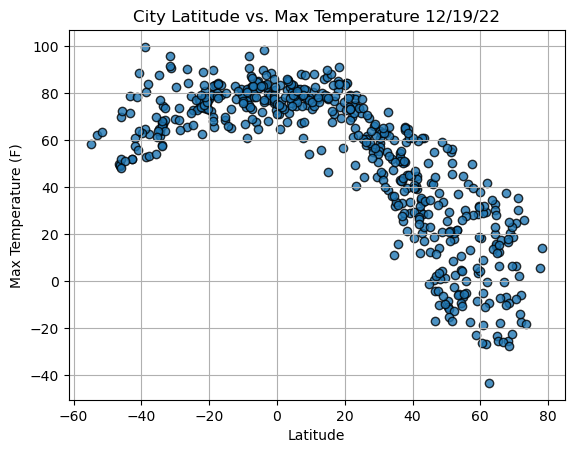

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

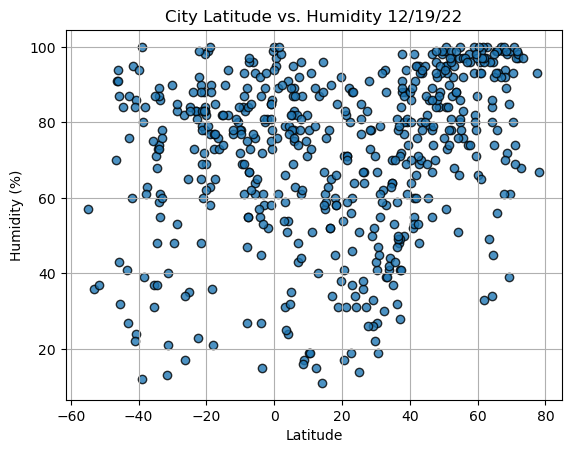

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

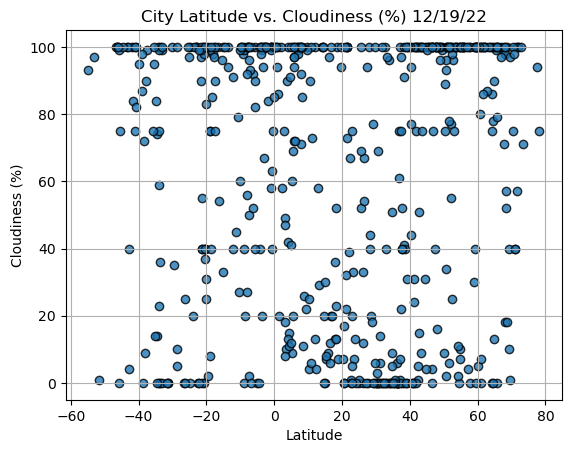

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

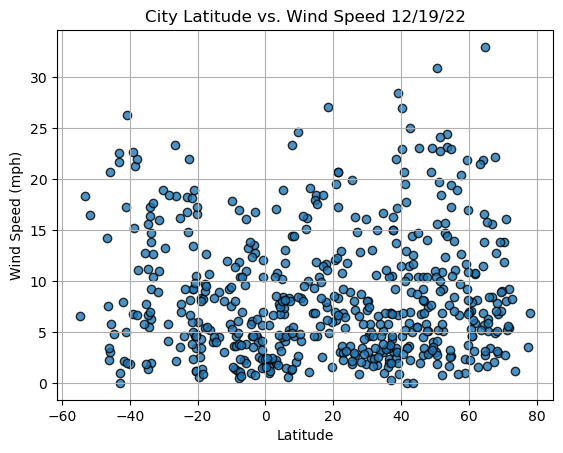

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [38]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [39]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

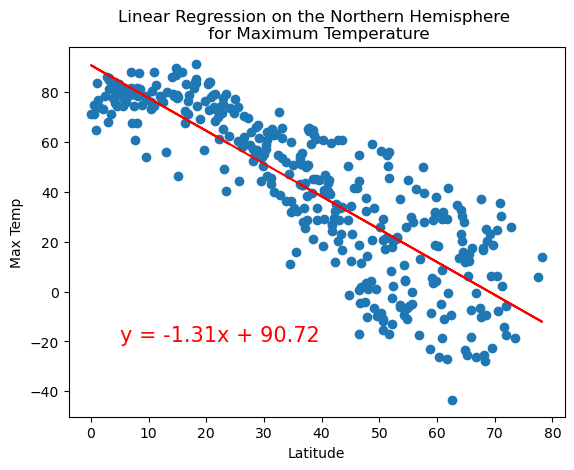

LinregressResult(slope=-1.314943939121985, intercept=90.72029453665894, rvalue=-0.8477238986205096, pvalue=6.36162591040585e-104, stderr=0.04277463984726173, intercept_stderr=1.813139233822372)

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-20))

linregress(x_values, y_values)

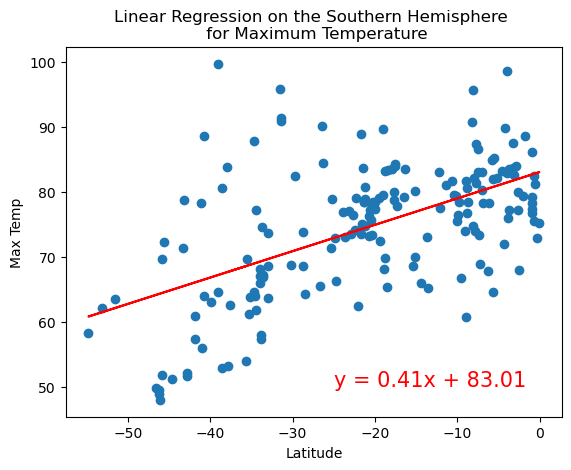

LinregressResult(slope=0.4054183604108787, intercept=83.01151185927844, rvalue=0.5535086949799531, pvalue=9.302438093739221e-16, stderr=0.045851725032008746, intercept_stderr=1.1510190083711351)

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,50))

linregress(x_values, y_values)

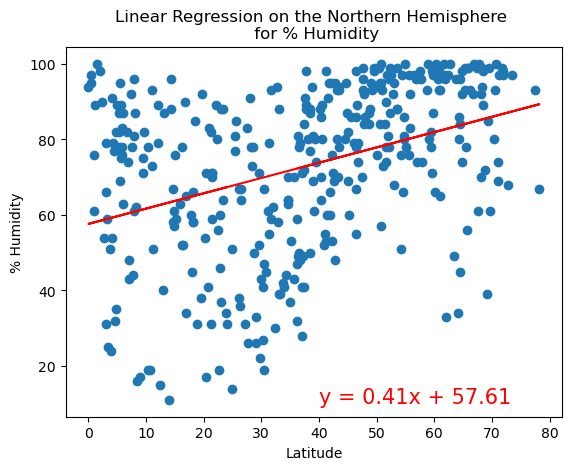

LinregressResult(slope=0.40547819132680574, intercept=57.60632007450674, rvalue=0.3775652440474643, pvalue=4.7523230208195307e-14, stderr=0.05169846342110903, intercept_stderr=2.191403894734235)

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

linregress(x_values, y_values)

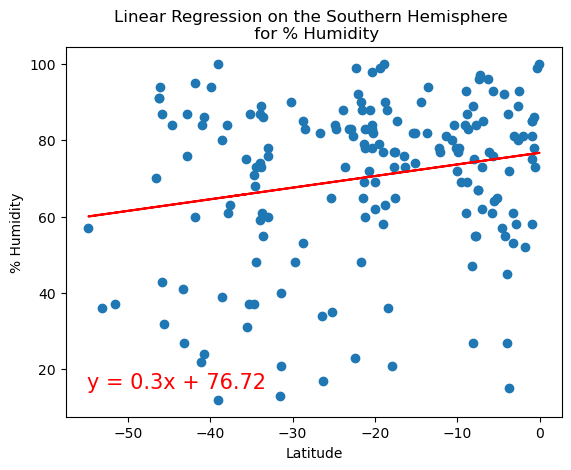

LinregressResult(slope=0.30417634421955214, intercept=76.72106038945509, rvalue=0.20494588772499017, pvalue=0.005922279401060046, stderr=0.1091897094330268, intercept_stderr=2.7409967888492535)

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-55,15))

linregress(x_values, y_values)

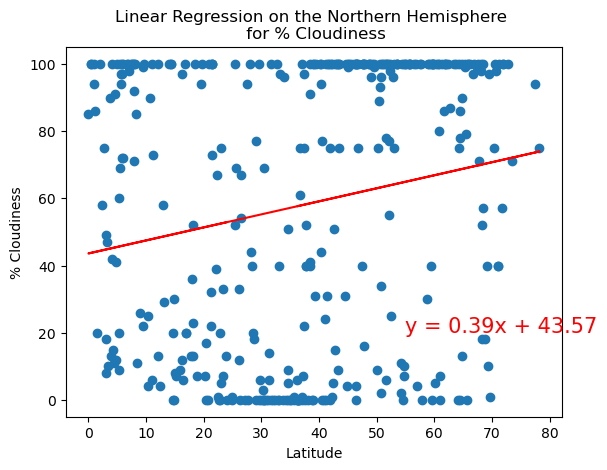

LinregressResult(slope=0.3880792061673865, intercept=43.57432962852739, rvalue=0.1903523408612015, pvalue=0.00022175738744844935, stderr=0.10405119845399897, intercept_stderr=4.41054117385539)

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(55,20))

linregress(x_values, y_values)

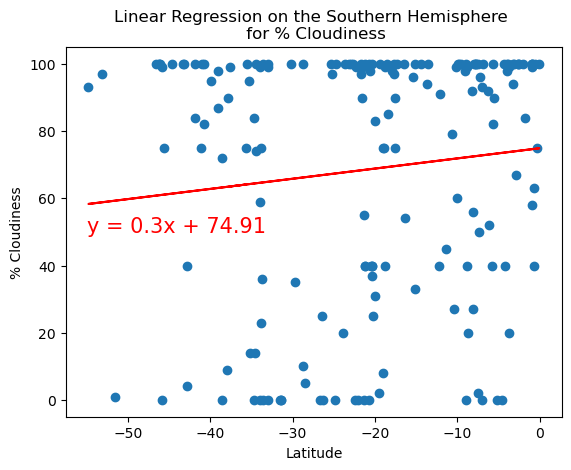

LinregressResult(slope=0.30268300374942675, intercept=74.90786063125293, rvalue=0.11289274677332295, pvalue=0.13241801888021876, stderr=0.20023965258547957, intercept_stderr=5.026629776625049)

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-55,50))

linregress(x_values, y_values)

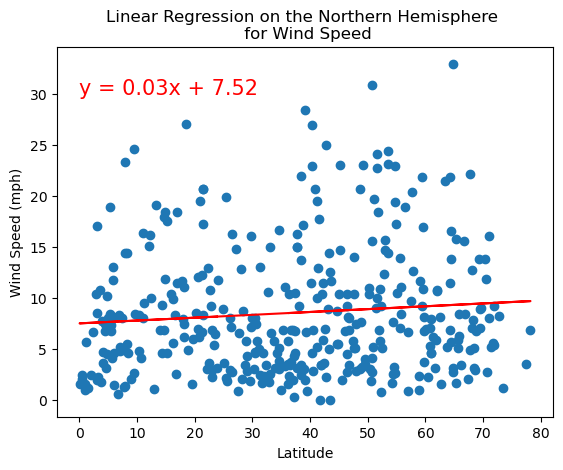

LinregressResult(slope=0.027970770816690586, intercept=7.5151175201855525, rvalue=0.09139921851741385, pvalue=0.07830641176920287, stderr=0.01584307443215067, intercept_stderr=0.6715591280224278)

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(0,30))

linregress(x_values, y_values)

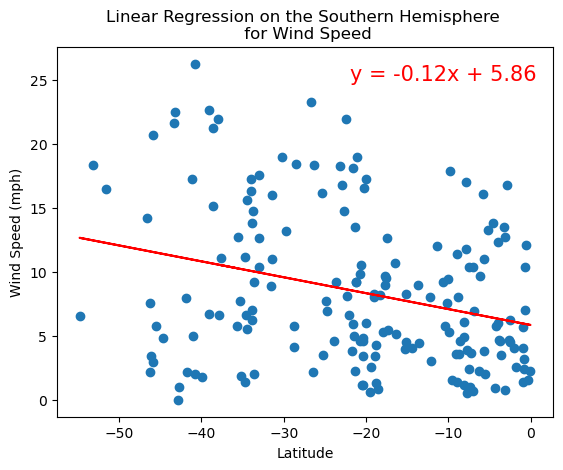

LinregressResult(slope=-0.1244710842290248, intercept=5.859273302937446, rvalue=-0.29095615031797323, pvalue=7.773265133737998e-05, stderr=0.030764268289568426, intercept_stderr=0.7722775436519121)

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-22,25))

linregress(x_values, y_values)